In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
pip install pyodbc


Note: you may need to restart the kernel to use updated packages.


In [6]:
from sqlalchemy import create_engine

# Define connection parameters
server = r'DESKTOP-CBADVFM\SQLEXPRESS'  # Use raw string or double backslashes
database = 'DE_CAPSTONE_PROJECT'        # Database name without brackets

# Create connection string for Windows Authentication
connection_string = f'mssql+pyodbc://{server}/{database}?trusted_connection=yes&driver=SQL+Server'

# Create engine
engine = create_engine(connection_string)




## Q1. A list showing employee number, last name, first name, sex, and salary for each employee

In [7]:
employees = pd.read_sql('select * from [dbo].[employees]',engine)
salaries = pd.read_sql('select * from [dbo].[salaries]',engine)

In [8]:
df = pd.merge(employees, salaries,'inner', on='emp_no')
df.sample(5)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,salary
191308,446621,s0001,1956-02-20,Samphel,Iisaku,F,1987-01-05,3,C,False,None,56704.0
224537,47683,s0001,1953-10-22,Jenwei,Lund,M,1993-01-18,10,A,False,None,63004.0
33195,211973,e0002,1955-09-03,Denny,Nitta,M,1997-06-23,9,C,False,None,48068.0
87432,26128,e0003,1956-05-27,Ipke,Barinka,M,1992-07-24,5,B,False,None,46803.0
235205,486528,s0002,1954-12-20,Fumiyo,Waschkowski,F,1993-11-12,3,C,False,None,46393.0


In [9]:
df1=df[['emp_no','last_name','first_name','sex','salary']]
df1.head(5)

,emp_no,last_name,first_name,sex,salary
0,100000,Emden,Hiroyasu,M,41408.0
1,100001,Antonakopoulos,Jasminko,M,40000.0
2,100002,Kolinko,Claudi,F,40000.0
3,100003,Trogemann,Marsja,M,40000.0
4,100004,Nitsch,Avishai,M,79525.0


## Q2. A list showing first name, last name, and hire date for employees who were hired in 1986.

In [13]:
df['hire_date'] = pd.to_datetime(df['hire_date'])

In [15]:
df2=df.loc[df['hire_date'].dt.year==1986,['first_name','last_name','hire_date']]
df2.head()

,first_name,last_name,hire_date
4,Avishai,Nitsch,1986-01-03
6,Janalee,Himler,1986-01-15
10,Georgi,Facello,1986-06-26
18,Saeko,Radwan,1986-08-23
25,Boutros,Emiris,1986-09-10


## Q3.A list showing the manager of each department with the following information: department number, department name, the manager's employee number, last name, first name.

In [17]:
dept_manager=pd.read_sql('select * from [dbo].[dept_manager]',engine)
departments=pd.read_sql('select * from [dbo].[departments]',engine)

In [19]:
df = pd.merge(employees, dept_manager,'inner', on='emp_no')
df1=pd.merge(df, departments,'inner', on='dept_no')

In [21]:
df3=df1[['dept_no','dept_name','emp_no','last_name','first_name']]
df3.head()

,dept_no,dept_name,emp_no,last_name,first_name
0,d001,Marketing,110022,Markovitch,Margareta
1,d001,Marketing,110039,Minakawa,Vishwani
2,d002,Finance,110085,Alpin,Ebru
3,d002,Finance,110114,Legleitner,Isamu
4,d003,Human Resources,110183,Ossenbruggen,Shirish


## Q4.A list showing the department of each employee with the following information: employee number, last name, first name, and department name

In [23]:
final_table=pd.read_sql('select * from [dbo].[FINAL_TABLE]',engine,parse_dates=['hire_date','birth_date','last_date'])
final_table.sample(5)

,emp_no,first_name,last_name,birth_date,sex,emp_title_id,title,salary,no_of_departments,dept_nos,dept_names,hire_date,no_of_projects,Last_performance_rating,left,last_date
232308,245822,Suebskul,Kropf,1961-11-30,F,s0002,Senior Staff,53837.0,1,d007,Sales,1986-03-05,6,B,False,NaT
172690,109829,Horward,Beznosov,1954-06-02,F,s0001,Staff,40000.0,2,"d004, d009","Production, Customer Service",1995-12-02,2,C,False,NaT
162952,100976,Dietrich,Mitzlaff,1963-09-11,F,e0004,Technique Leader,51756.0,1,d005,development,1988-10-15,7,A,False,NaT
138652,76773,Baruch,Wallrath,1954-12-03,F,e0001,Assistant Engineer,40000.0,1,d004,Production,1987-11-29,9,B,False,NaT
5093,402921,Mircea,Veeraraghavan,1952-11-24,M,s0001,Staff,60473.0,2,"d002, d003","Finance, Human Resources",1987-04-03,2,B,False,NaT


In [24]:
df4=final_table[['emp_no','last_name','first_name','dept_names']]
df4.head(5)

,emp_no,last_name,first_name,dept_names
0,38121,Gini,Aram,Production
1,38122,Clouatre,Garnik,Finance
2,38123,Cummings,Kien,Sales
3,38124,Waschkowski,Mayuko,"development, Research"
4,38125,Jumpertz,Kiyokazu,development


## Q5. A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B“

In [27]:
emp=employees.loc[(employees['first_name']=='Hercules')&(employees['last_name'].str.startswith('B')),['first_name','last_name','sex']]
emp.head()

,first_name,last_name,sex
3101,Hercules,Benzmuller,M
11361,Hercules,Brendel,F
28604,Hercules,Baranowski,M
31131,Hercules,Bernatsky,M
34933,Hercules,Bail,F


## Q6.A list showing all employees in the Sales department, including their employee number,last name, first name, and department name

In [9]:
FINAL_TB=pd.read_sql('select * from [dbo].[FINAL_TB]',engine, parse_dates=['hire_date','birth_date','last_date'])
FINAL_TB.sample(5)

,emp_no,first_name,last_name,birth_date,sex,emp_title_id,title,salary,dept_no,dept_name,hire_date,no_of_projects,Last_performance_rating,left,last_date
261966,488163,Arunachalam,Schneeberger,1952-03-11,M,s0001,Staff,59290.0,d002,Finance,1992-01-28,10,B,False,NaT
190748,429595,Saddek,Ishibashi,1963-10-15,M,s0002,Senior Staff,46417.0,d002,Finance,1987-06-28,6,B,True,1995-06-19
167966,41086,Spyrose,Boudaillier,1955-04-05,F,e0004,Technique Leader,40000.0,d005,development,1996-11-11,9,S,True,2007-09-20
81833,249110,Yongmao,Lund,1954-04-25,F,s0001,Staff,59664.0,d009,Customer Service,1985-07-22,2,A,False,NaT
117200,278203,Yolla,Swist,1957-10-13,F,s0001,Staff,42619.0,d007,Sales,1986-04-02,9,B,False,NaT


In [39]:
df6=FINAL_TB.loc[FINAL_TB['dept_name']=='Sales',['emp_no','last_name','first_name','dept_name']]
df6.head()

,emp_no,last_name,first_name,dept_name
5,100004,Nitsch,Avishai,Sales
6,100005,Foong,Anneke,Sales
8,100007,Bernardinello,Zine,Sales
10,100009,Veldwijk,Barton,Sales
19,100016,Schnabel,Yishai,Sales


## Q7.A list showing all employees in the Sales and Development departments, including their employee number, last name, first name, and department name

In [41]:
df7=df1.loc[(df1['dept_name']=='Sales')|(df1['dept_name']=='development'),['emp_no','last_name','first_name','dept_name']]
df7.head()

,emp_no,last_name,first_name,dept_name
10,110511,Hagimont,DeForest,development
11,110567,DasSarma,Leon,development
16,111035,Kaelbling,Przemyslawa,Sales
17,111133,Zhang,Hauke,Sales


## Q8. A list showing the frequency count of employee last names, in descending order.( i.e., how many employees share each last name

In [43]:
emp_count=employees.last_name.value_counts()
emp_count

last_name
Baba         226
Gelosh       223
Coorg        223
Farris       222
Sudbeck      222
            ... 
Zykh         148
Georgatos    148
Merro        147
Sadowsky     145
Foolsday       1
Name: count, Length: 1638, dtype: int64

## Q9.Histogram to show the salary distribution among the employees

In [45]:
df = pd.merge(employees, salaries, on='emp_no')
df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,salary
0,100000,s0002,1956-01-11,Hiroyasu,Emden,M,1991-07-02,1,S,False,None,41408.0
1,100001,e0002,1953-02-07,Jasminko,Antonakopoulos,M,1994-12-25,9,B,False,None,40000.0
2,100002,s0002,1957-03-04,Claudi,Kolinko,F,1988-02-20,1,B,False,None,40000.0
3,100003,e0003,1959-08-30,Marsja,Trogemann,M,1987-08-26,7,A,False,None,40000.0
4,100004,s0001,1960-04-16,Avishai,Nitsch,M,1986-01-03,2,B,False,None,79525.0


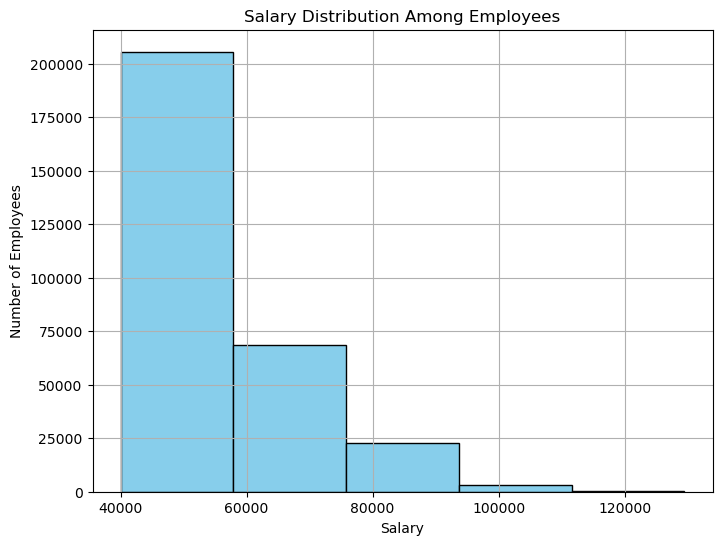

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(df['salary'], bins=5, color='skyblue', edgecolor='black')
plt.title('Salary Distribution Among Employees')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

## Q10.Bar graph to show the Average salary per title (designation)

In [49]:
unique_employees = FINAL_TB.drop_duplicates(subset='emp_no')


avg_salary_by_title = unique_employees.groupby('title')['salary'].mean().sort_values(ascending=False).reset_index()

avg_salary_by_title

,title,salary
0,Senior Staff,58550.172704
1,Staff,58465.382850
2,Manager,51531.041667
3,Technique Leader,48582.896092
4,Assistant Engineer,48564.434447
5,Engineer,48535.336511
6,Senior Engineer,48506.799871


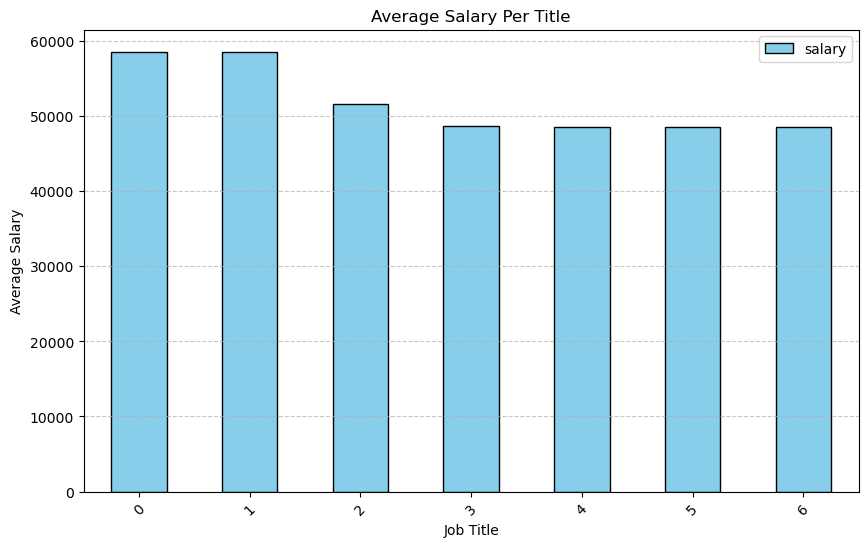

In [51]:
avg_salary_by_title.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title('Average Salary Per Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Q11. Calculate employee tenure & show the tenure distribution among the employees

In [15]:
FINAL_TB['hire_date'] = pd.to_datetime(FINAL_TB['hire_date'])
FINAL_TB['last_date'] = pd.to_datetime(FINAL_TB['last_date'])
new_df = pd.DataFrame()
new_df['emp_no'] = FINAL_TB['emp_no']
max_last_date = FINAL_TB['last_date'].max()  
new_df['tenure'] = ((FINAL_TB['last_date'].fillna(max_last_date) - FINAL_TB['hire_date']).dt.days / 365.0)

new_df.head()

,emp_no,tenure
0,100000,21.704110
1,100001,18.219178
2,100001,18.219178
3,100002,25.068493
4,100003,25.556164


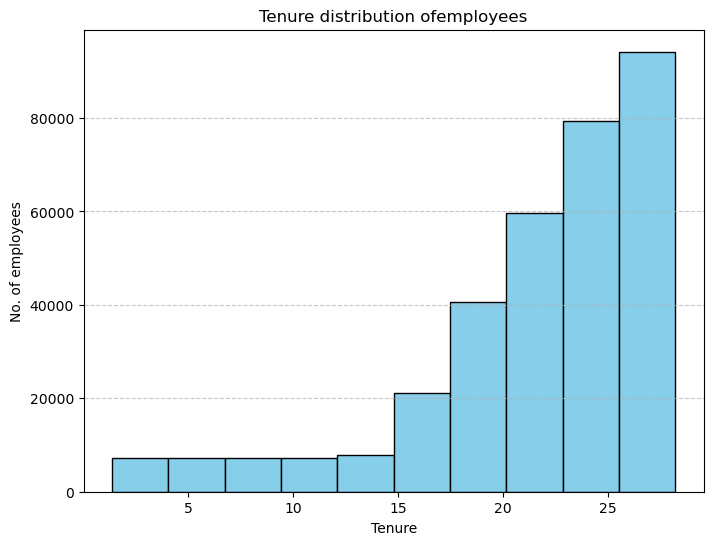

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(new_df['tenure'], color='skyblue', edgecolor='black')
plt.title('Tenure distribution ofemployees')
plt.xlabel('Tenure')
plt.ylabel('No. of employees')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## ** High level metrics **

##### --Total Employee

In [70]:
Total_emp=final_table['emp_no'].count()
Total_emp

300024

##### --Total Employee left

In [72]:
Total_emp_left=final_table[final_table['left']==True]['emp_no'].count()
Total_emp_left

29867

##### --Employee more than one department

In [74]:
Emp_more_than_one_dept=final_table[final_table['no_of_departments']>1]['emp_no'].count()
Emp_more_than_one_dept

31579

##### --Total Roles

In [77]:
Total_Role=final_table['title'].nunique()
Total_Role

7

##### --Total Department

In [80]:
Total_dept=FINAL_TB['dept_name'].nunique()
Total_dept

9

##### --Average salary

In [83]:
Avg_salary=final_table['salary'].mean()
Avg_salary

52970.732451403885

##### --Total Manager

In [86]:
Total_manager=FINAL_TB[FINAL_TB['title']=='Manager']['emp_no'].count()
Total_manager

24

##### --Average Tenure of the Employee who left

In [89]:
Average_Tenure = (((final_table['last_date'] - final_table['hire_date']).dt.days) / 365.0)[final_table['left'] == 1].mean()
Average_Tenure


7.527220724206081

##### --Average Performance Rating

In [92]:
# Step 1: Aggregate total employees by rating
total_emp = final_table.groupby('Last_performance_rating').size().reset_index(name='total_emp')

# Step 2: Calculate the weighted average performance rating
average_performance_rating = (
    total_emp.apply(lambda row: 
        row['total_emp'] * {
            'PIP': 1, 'C': 2, 'B': 3, 'S': 4, 'A': 5
        }.get(row['Last_performance_rating'], 0), axis=1).sum() 
    / total_emp['total_emp'].sum()
)

# Step 3: Map the average performance rating to categories
if 1 <= average_performance_rating < 2:
    avg_ratings = 'PIP'
elif 2 <= average_performance_rating < 3:
    avg_ratings = 'C'
elif 3 <= average_performance_rating < 4:
    avg_ratings = 'B'
elif 4 <= average_performance_rating < 5:
    avg_ratings = 'S'
else:
    avg_ratings = 'A'

avg_ratings



'B'

##### --Average Number of Projects per Employee

In [95]:
avg_projects = final_table['no_of_projects'].mean()
avg_projects

5.504826280564221

##### --max and min  tenure

In [98]:
max_last_date = final_table['last_date'].max()  
max_tenure = ((final_table['last_date'].fillna(max_last_date) - final_table['hire_date']).dt.days / 365.0).max()
min_tenure = ((final_table['last_date'].fillna(max_last_date) - final_table['hire_date']).dt.days / 365.0).min()

print(f"Max Tenure: {max_tenure:.2f} years")
print(f"Min Tenure: {min_tenure:.2f} years")

Max Tenure: 28.21 years
Min Tenure: 1.37 years


##### --Average Age of the Employee who left

In [101]:
final_table['birth_date'] = pd.to_datetime(final_table['birth_date'])
final_table['last_date'] = pd.to_datetime(final_table['last_date'])

avg_age = ((final_table['last_date'] - final_table['birth_date']).dt.days / 365.0).mean()

print(f"Average Age: {avg_age:.2f}")

Average Age: 38.99


##### --Salary range

In [104]:
max_sal = final_table['salary'].max()
min_sal = final_table['salary'].min()

print(f"Max Salary: {max_sal}")
print(f"Min Salary: {min_sal}")

Max Salary: 129492.0
Min Salary: 40000.0


##  ** Employee analysis **

##### --1. Distribution of Employees by Gender

In [138]:
female_count = final_table[final_table['sex'] == 'F'].shape[0]
male_count = final_table[final_table['sex'] == 'M'].shape[0]

gender_counts = pd.DataFrame({
    'gender': ['Female', 'Male'],
    'total_no': [female_count, male_count]
})

total_count = gender_counts['total_no'].sum()
gender_counts['pct'] = (gender_counts['total_no'] * 100) / total_count
gender_counts

,gender,total_no,pct
0,Female,120051,40.013799
1,Male,179973,59.986201


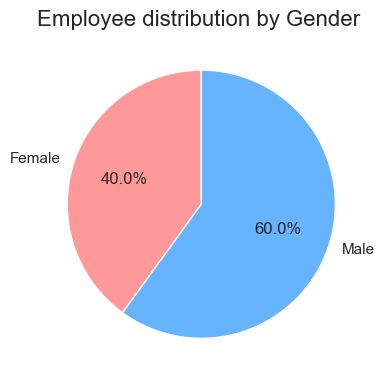

In [146]:
plt.figure(figsize=(4, 4))  # Set the size of the plot
plt.pie(gender_counts['total_no'], labels=gender_counts['gender'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Employee distribution by Gender ', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

##### --2. Employee distribution by performance ratings

In [148]:
df = final_table.groupby('Last_performance_rating').size().reset_index(name='total_emp')
df['pct'] = (df['total_emp'] * 100) / df['total_emp'].sum()
df = df.sort_values('total_emp', ascending=False)
df

,Last_performance_rating,total_emp,pct
1,B,107154,35.715143
0,A,95919,31.970442
2,C,71304,23.766099
3,PIP,15105,5.034597
4,S,10542,3.513719


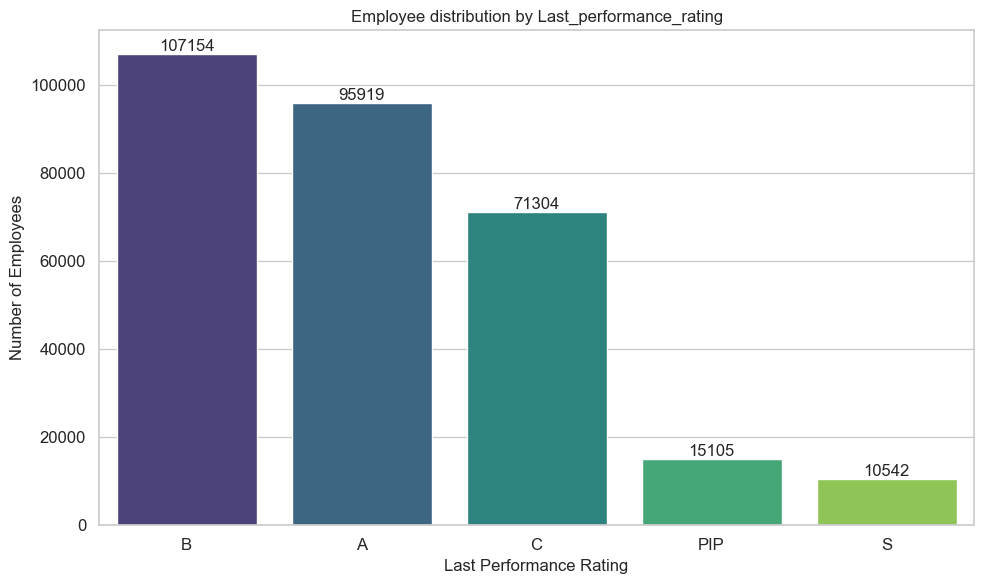

In [150]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Last_performance_rating', y='total_emp', data=df, hue='Last_performance_rating', palette='viridis')
plt.title('Employee distribution by Last_performance_rating')
plt.xlabel('Last Performance Rating')
plt.ylabel('Number of Employees')
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)

for index, value in enumerate(df['total_emp']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

##### --3. Employee Count by Job Title

In [115]:
result = final_table.groupby('title').size().reset_index(name='total_emp')
result = result.sort_values(by='total_emp', ascending=False)
result

,title,total_emp
5,Staff,107384
3,Senior Engineer,97747
1,Engineer,47303
4,Senior Staff,26583
6,Technique Leader,15148
0,Assistant Engineer,5835
2,Manager,24


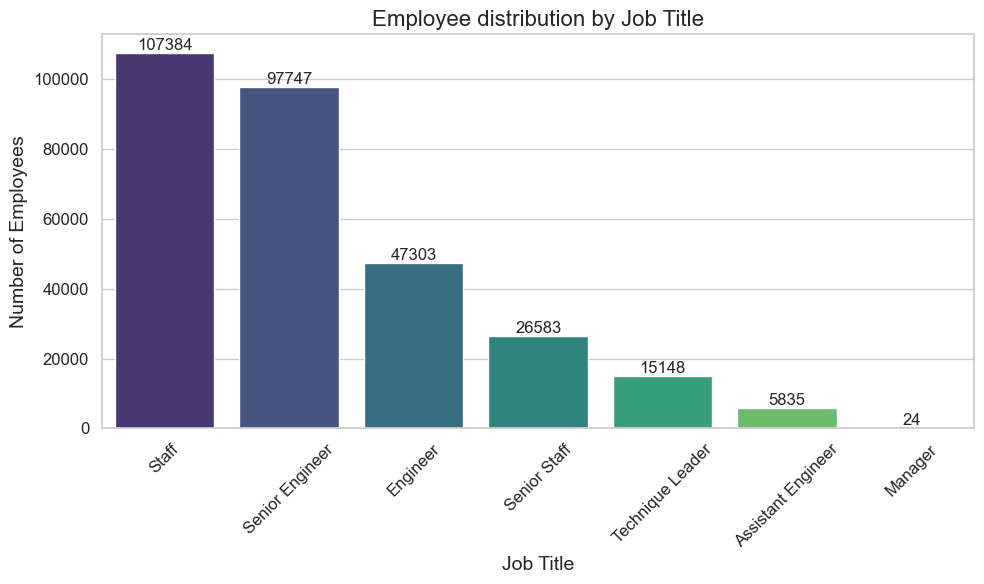

In [136]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='total_emp', data=result,hue='title', palette='viridis')
plt.title('Employee distribution by Job Title', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for index, value in enumerate(result['total_emp']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

##### --4.Employee with No. of projects

In [592]:
# Categorize projects with proper binning
final_table['project_category'] = pd.cut(
    final_table['no_of_projects'],
    bins=[0, 3, 7, 10],
    labels=['Low(1-3)', 'Medium(4-7)', 'High(8-10)'],
    right=True,
    include_lowest=True
)

# Count employees by category with observed=True
summary = (final_table.groupby('project_category', observed=True)['emp_no']
           .count()
           .reset_index()
           .rename(columns={'emp_no': 'Total_emp'}))

# Calculate percentage
summary['PCT'] = (summary['Total_emp'] * 100.0) / summary['Total_emp'].sum()
summary = summary.sort_values('Total_emp', ascending=False)


summary

,project_category,Total_emp,PCT
1,Medium(4-7),119984,39.991467
2,High(8-10),90182,30.058262
0,Low(1-3),89858,29.950271


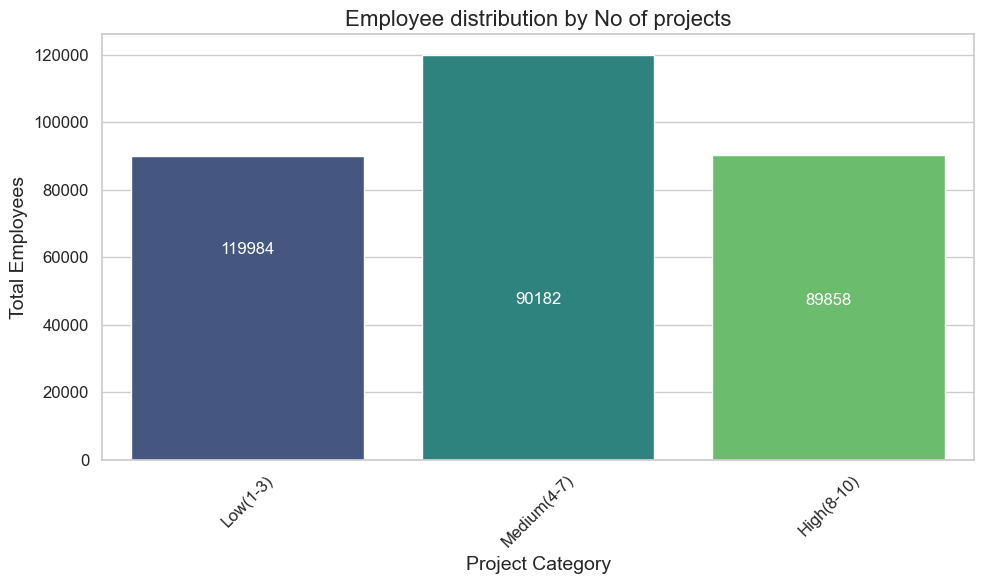

In [203]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='project_category', y='Total_emp', data=summary,hue='project_category', palette='viridis')
plt.title('Employee distribution by No of projects', fontsize=16)
plt.xlabel('Project Category', fontsize=14)
plt.ylabel('Total Employees', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for index, value in enumerate(summary['Total_emp']):
    plt.text(index, value * 0.5, str(value), color = 'white', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

##### --5. Employees Hire Trends

In [206]:
final_table["hire_year"] = pd.to_datetime(final_table["hire_date"]).dt.year  
result = final_table.groupby("hire_year").size().reset_index(name="employee_count")  
result = result.sort_values(by="hire_year")  
result

,hire_year,employee_count
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


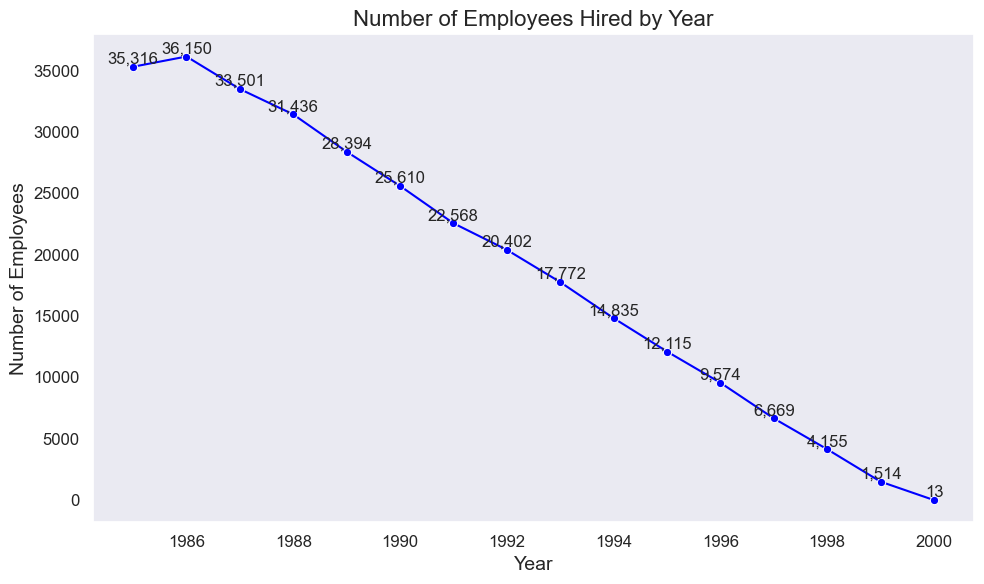

In [208]:
sns.set(style="dark")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hire_year', y='employee_count', data=result, marker='o', color='blue')

plt.title('Number of Employees Hired by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for index, row in result.iterrows():
    plt.text(row['hire_year'], row['employee_count'] + 0.1, f"{row['employee_count']:,}", ha='center', va='bottom', fontsize=12)

plt.grid(False)
plt.tight_layout()
plt.show()

##### --6. Employee Exit Trends 

In [598]:
# Convert dates safely and filter valid records
final_table['last_date'] = pd.to_datetime(final_table['last_date'], errors='coerce')
final_table_valid = final_table[final_table['last_date'].notna()].copy()  # Add .copy() here

# Now safely create new column
final_table_valid.loc[:, 'exit_year'] = final_table_valid['last_date'].dt.year  # Using .loc

# Count exits by year
exit_counts = (final_table_valid.groupby('exit_year', observed=True)
               .agg(total_exits=('emp_no', 'count'))
               .reset_index()
               .sort_values('exit_year')
               .reset_index(drop=True))

exit_counts

,exit_year,total_exits
0,1986,42
1,1987,305
2,1988,605
3,1989,916
4,1990,1131
5,1991,1375
6,1992,1494
7,1993,1759
8,1994,1870
9,1995,2085


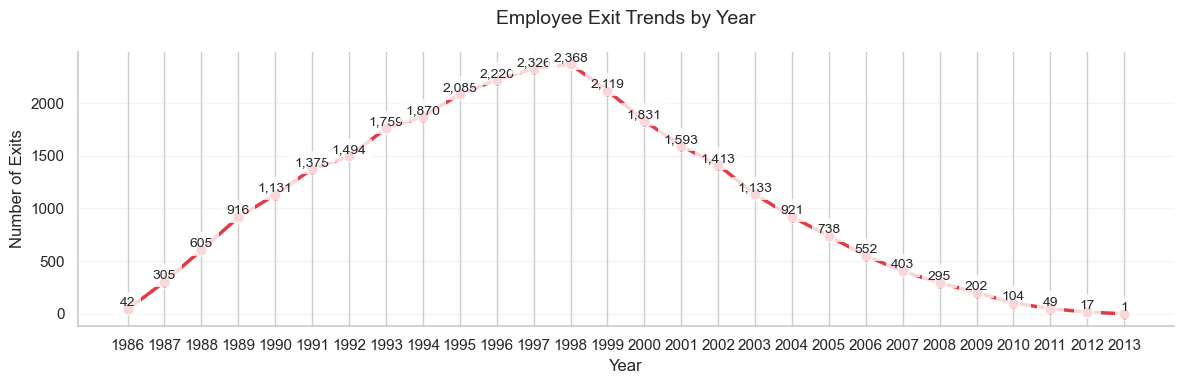

In [602]:
plt.figure(figsize=(12, 4))
ax = sns.lineplot(
    x='exit_year',
    y='total_exits',
    data=exit_counts,
    marker='o',
    markersize=8,
    linewidth=2.5,
    color='#e63946'
)

plt.title('Employee Exit Trends by Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Exits', fontsize=12)

# Add data labels with improved positioning
for x, y in zip(exit_counts['exit_year'], exit_counts['total_exits']):
    ax.text(x, y+0.5, f'{y:,}', 
            ha='center', 
            va='bottom',
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Style improvements
sns.despine()
plt.grid(axis='y', alpha=0.2)
plt.xticks(exit_counts['exit_year'])  # Ensure all years are shown
plt.tight_layout()
plt.show()

#####  --7. Year wise total employee

In [226]:
# Aggregating data
hired = final_table.groupby(final_table['hire_date'].dt.year).size().reset_index(name='total_emp_hired')
left = final_table[final_table['left'] == 1].groupby(final_table['last_date'].dt.year).size().reset_index(name='total_emp_left')

# Creating a union of all years
all_years = pd.DataFrame({'years': pd.Series(sorted(set(hired['hire_date'].tolist() + left['last_date'].tolist()))).astype(int)})

# Merging data
merged = pd.merge(all_years, hired, left_on='years', right_on='hire_date', how='left').fillna(0)
merged = pd.merge(merged, left, left_on='years', right_on='last_date', how='left').fillna(0)

merged.drop(['hire_date', 'last_date'], axis=1, inplace=True)

# Calculating cumulative counts
merged['cum_hired_emp_count'] = merged['total_emp_hired'].cumsum().astype(int)
merged['cum_left_emp_count'] = merged['total_emp_left'].cumsum().astype(int)

# Calculating new count and total employee count
merged['new_count'] = merged['cum_left_emp_count'].shift(1).fillna(0).astype(int)
merged['total_emp'] = merged['cum_hired_emp_count'] - merged['new_count']

merged

,years,total_emp_hired,total_emp_left,cum_hired_emp_count,cum_left_emp_count,new_count,total_emp
0,1985,35316.0,0.0,35316,0,0,35316
1,1986,36150.0,42.0,71466,42,0,71466
2,1987,33501.0,305.0,104967,347,42,104925
3,1988,31436.0,605.0,136403,952,347,136056
4,1989,28394.0,916.0,164797,1868,952,163845
5,1990,25610.0,1131.0,190407,2999,1868,188539
6,1991,22568.0,1375.0,212975,4374,2999,209976
7,1992,20402.0,1494.0,233377,5868,4374,229003
8,1993,17772.0,1759.0,251149,7627,5868,245281
9,1994,14835.0,1870.0,265984,9497,7627,258357


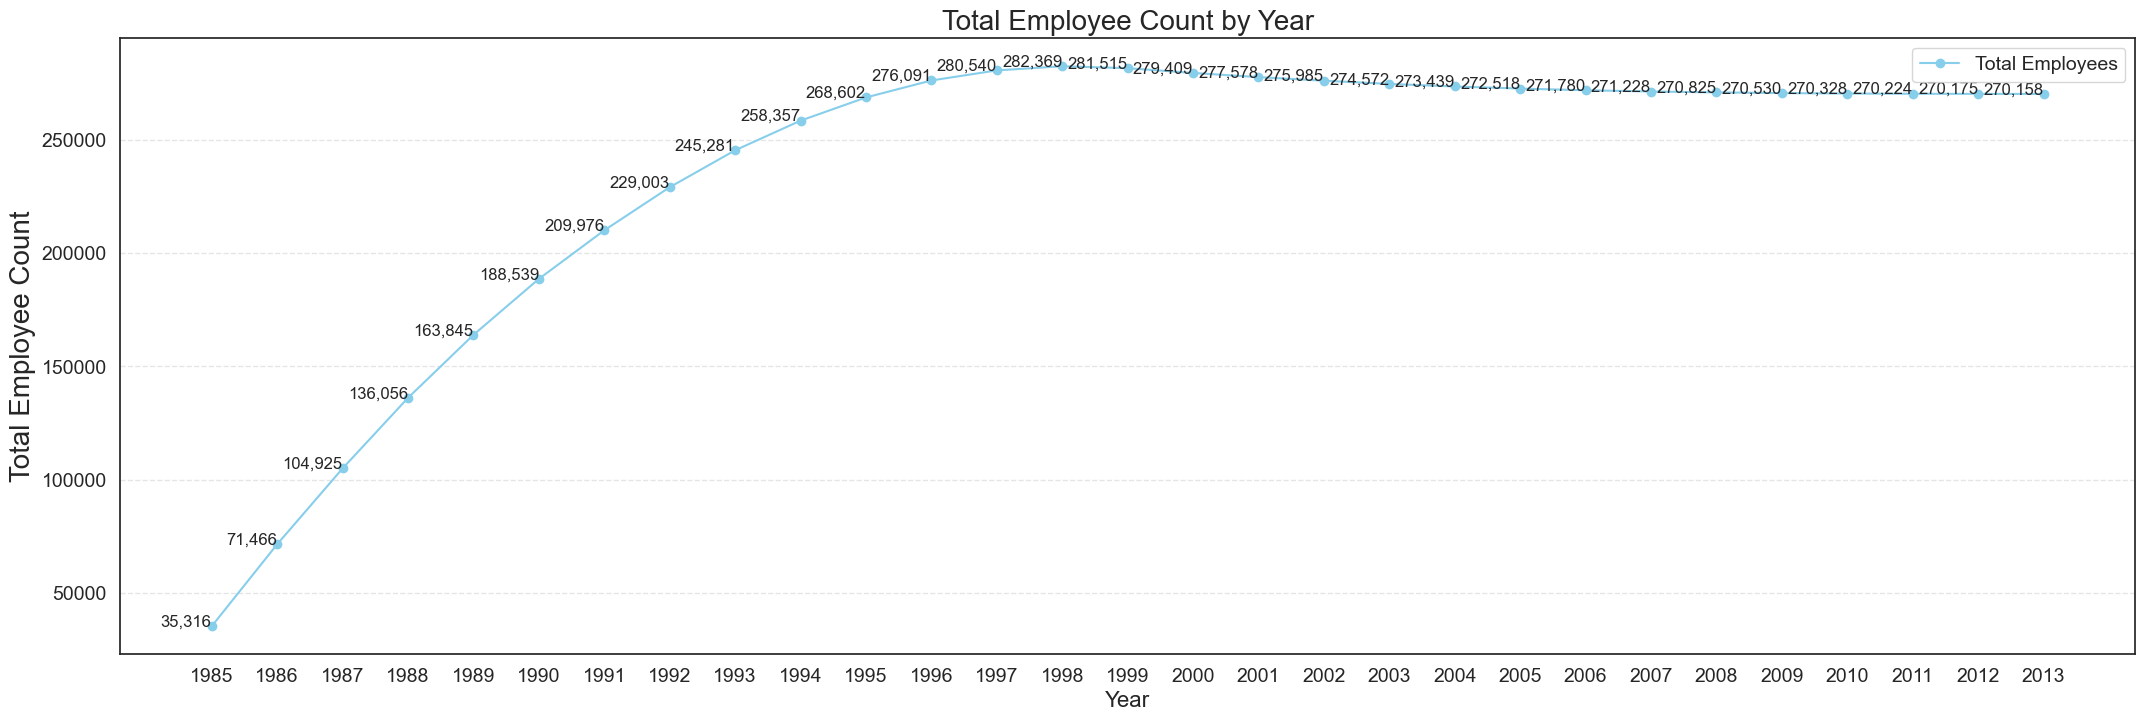

In [252]:
# Visualization
plt.figure(figsize=(26, 8))
plt.plot(merged['years'], merged['total_emp'], marker='o', color='skyblue', label='Total Employees')

# Adding data labels with thousand separator
for index, value in enumerate(merged['total_emp']):
    plt.text(merged['years'].iloc[index], value + 5, f"{value:,}", ha='right', fontsize=12)

plt.title('Total Employee Count by Year', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Employee Count', fontsize=20)
plt.xticks(merged['years'], fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(fontsize=14)
plt.show()


## ** Department analysis **

##### --1. Department wise Employee

In [257]:
result = FINAL_TB.groupby('dept_name').size().reset_index(name='total_emp')
result = result.sort_values(by='total_emp', ascending=False).reset_index(drop=True)
result

,dept_name,total_emp
0,development,85707
1,Production,73485
2,Sales,52245
3,Customer Service,23580
4,Research,21126
5,Marketing,20211
6,Quality Management,20117
7,Human Resources,17786
8,Finance,17346


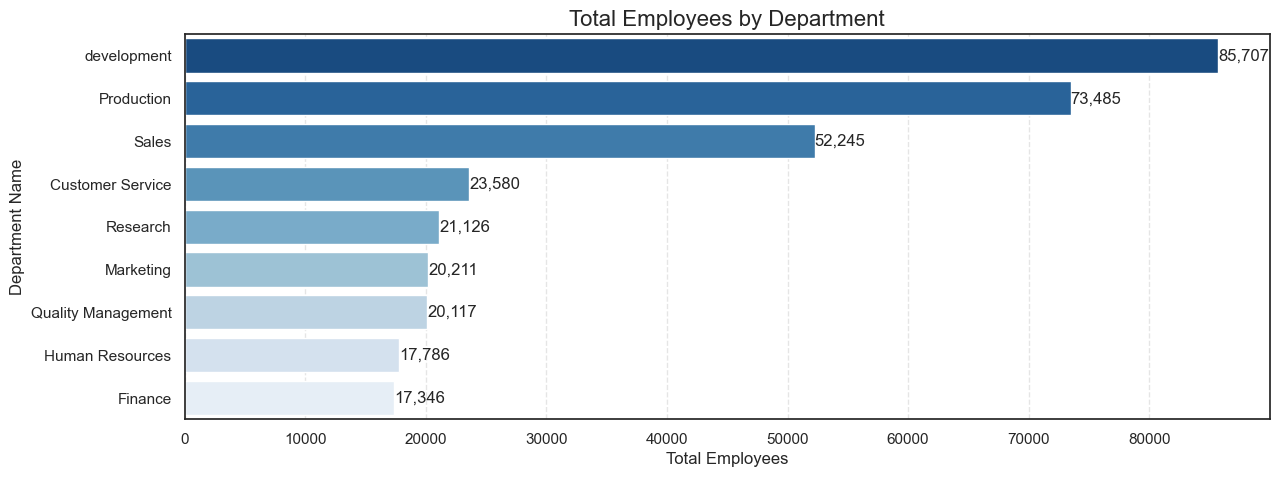

In [267]:
# Visualization
plt.figure(figsize=(14, 5))
sns.barplot(x='total_emp', y='dept_name', data=result, hue='dept_name', palette='Blues_r', legend=False)

# Adding data labels with thousand separator
for index, value in enumerate(result['total_emp']):
    plt.text(value + 1, index, f"{value:,}", va='center')

plt.title('Total Employees by Department', fontsize=16)
plt.xlabel('Total Employees', fontsize=12)
plt.ylabel('Department Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

##### --2.Department wise average salary

In [274]:
# Grouping and calculating average salary and employee count
df_grouped = FINAL_TB.groupby('dept_name').agg(avg_salary=('salary', 'mean'),
                                         total_employees=('salary', 'count')).reset_index()
df_grouped = df_grouped.sort_values(by='avg_salary', ascending=False)
df_grouped

,dept_name,avg_salary,total_employees
7,Sales,69832.127151,52245
3,Marketing,61095.897383,20211
1,Finance,59533.516546,17346
6,Research,48850.189719,21126
4,Production,48760.450827,73485
8,development,48697.334663,85707
0,Customer Service,47998.670441,23580
5,Quality Management,46456.005717,20117
2,Human Resources,44678.646801,17786


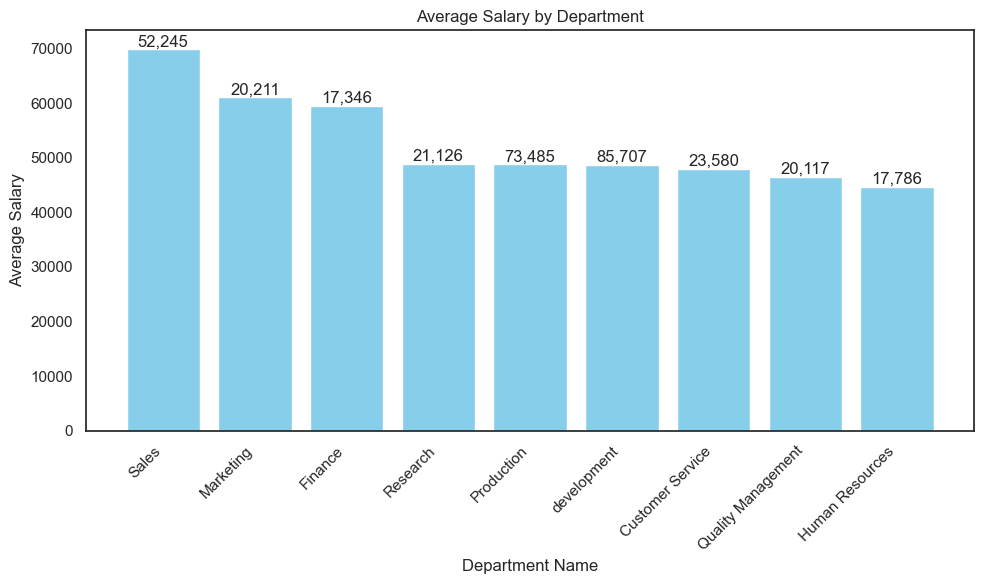

In [276]:
# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(df_grouped['dept_name'], df_grouped['avg_salary'], color='skyblue')

# Adding data labels with thousand separator
for bar, count in zip(bars, df_grouped['total_employees']):
    plt.text(bar.get_x() + bar.get_width() / 2,  
             bar.get_height(), 
             f'{count:,}',  # Thousand separator for employee count
             ha='center', va='bottom')

plt.title('Average Salary by Department')
plt.xlabel('Department Name')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### --3.Department wise no_of manager

In [281]:
# Filter and aggregate data
manager_counts = (FINAL_TB[FINAL_TB['title'] == 'Manager']
                  .groupby('dept_name')['emp_no']
                  .count()
                  .reset_index()
                  .rename(columns={'emp_no': 'total_manager'})
                  .sort_values(by='total_manager', ascending=False))

manager_counts

,dept_name,total_manager
0,Customer Service,4
4,Production,4
5,Quality Management,4
1,Finance,2
2,Human Resources,2
3,Marketing,2
6,Research,2
7,Sales,2
8,development,2


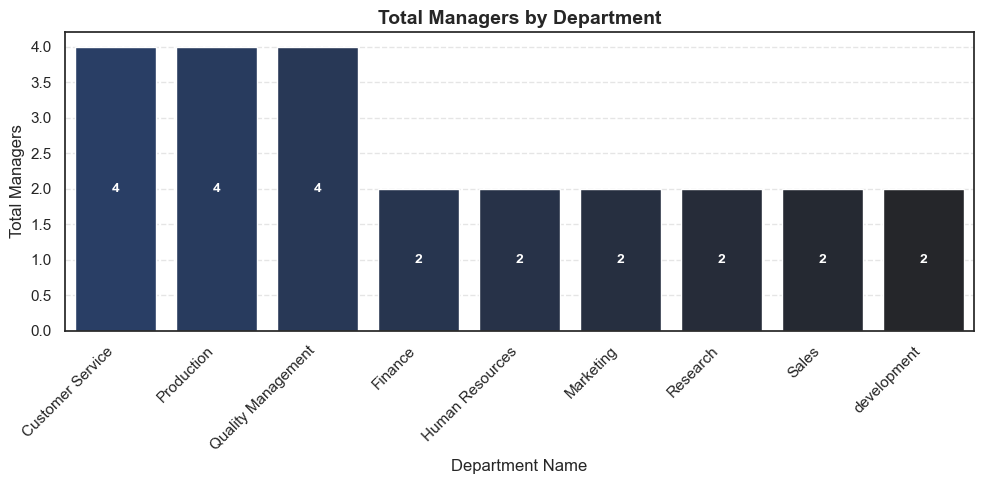

In [309]:

# Visualization
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='dept_name', y='total_manager', hue='dept_name', data=manager_counts, palette='dark:#1f3b6f_r', legend=False)

# Add data labels inside bars with white color
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2, p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Enhancements
plt.title('Total Managers by Department', fontsize=14, fontweight='bold')
plt.xlabel('Department Name', fontsize=12)
plt.ylabel('Total Managers', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.5)  
plt.tight_layout()
plt.show()

##### --4. Year wise employee of each department

In [344]:
import pandas as pd

# Aggregating data
hired = FINAL_TB.groupby(['dept_name', FINAL_TB['hire_date'].dt.year]).size().reset_index(name='total_emp_hired')
left = FINAL_TB[FINAL_TB['left'] == 1].groupby(['dept_name', FINAL_TB['last_date'].dt.year]).size().reset_index(name='total_emp_left')

# Creating a union of all years and departments (compatible with older pandas versions)
all_years = pd.MultiIndex.from_product(
    [FINAL_TB['dept_name'].unique(), 
     sorted(set(hired['hire_date'].tolist() + left['last_date'].tolist()))]
).to_frame().reset_index(drop=True)
all_years.columns = ['dept_name', 'years']  # Assign proper column names

# Merging data
merged = pd.merge(all_years, hired, left_on=['dept_name', 'years'], right_on=['dept_name', 'hire_date'], how='left').fillna(0)
merged = pd.merge(merged, left, left_on=['dept_name', 'years'], right_on=['dept_name', 'last_date'], how='left').fillna(0)

# Dropping unnecessary columns
merged.drop(['hire_date', 'last_date'], axis=1, inplace=True)

# Calculating cumulative counts (by department)
merged['cum_hired_emp_count'] = merged.groupby('dept_name')['total_emp_hired'].cumsum().astype(int)
merged['cum_left_emp_count'] = merged.groupby('dept_name')['total_emp_left'].cumsum().astype(int)

# Calculating new count and total employee count
merged['new_count'] = merged.groupby('dept_name')['cum_left_emp_count'].shift(1).fillna(0).astype(int)
merged['total_emp'] = merged['cum_hired_emp_count'] - merged['new_count']

merged

,dept_name,years,total_emp_hired,total_emp_left,cum_hired_emp_count,cum_left_emp_count,new_count,total_emp
0,Research,1985.0,2299.0,0.0,2299,0,0,2299
1,Research,1986.0,2318.0,0.0,4617,0,0,4617
2,Research,1987.0,2103.0,0.0,6720,0,0,6720
3,Research,1988.0,1974.0,3.0,8694,3,0,8694
4,Research,1989.0,1836.0,2.0,10530,5,3,10527
...,...,...,...,...,...,...,...,...
247,Quality Management,2008.0,0.0,3.0,18177,166,163,18014
248,Quality Management,2009.0,0.0,1.0,18177,167,166,18011
249,Quality Management,2010.0,0.0,0.0,18177,167,167,18010
250,Quality Management,2011.0,0.0,0.0,18177,167,167,18010


##  ** Salary analysis **

##### --1. Year-wise average salary

In [380]:
final_table['hire_year'] = final_table['hire_date'].dt.year
final_table['last_year'] = final_table['last_date'].dt.year

# Aggregating data
hired_df = final_table.groupby('hire_year').agg({
    'emp_no': 'count',
    'salary': 'sum'
}).rename(columns={'emp_no': 'total_emp_hired', 'salary': 'total_salary_hired'})

left_df = final_table.groupby('last_year').agg({
    'emp_no': 'count',
    'salary': 'sum'
}).rename(columns={'emp_no': 'total_emp_left', 'salary': 'total_salary_left'})

# Merging data
merged_df = pd.merge(hired_df, left_df, left_index=True, right_index=True, how='outer').fillna(0)
merged_df.reset_index(inplace=True)
merged_df.rename(columns={'index': 'years'}, inplace=True)
merged_df['years'] = merged_df['years'].astype(int)

# Cumulative values
merged_df['cum_hired_emp_count'] = merged_df['total_emp_hired'].cumsum().astype(int)
merged_df['cum_left_emp_count'] = merged_df['total_emp_left'].cumsum().astype(int)
merged_df['cum_hired_salary'] = merged_df['total_salary_hired'].cumsum().round(2)
merged_df['cum_left_salary'] = merged_df['total_salary_left'].cumsum().round(2)

# Calculating metrics
merged_df['new_count'] = merged_df['cum_left_emp_count'].shift(1).fillna(0).astype(int)
merged_df['total_emp'] = merged_df['cum_hired_emp_count'] - merged_df['new_count']
merged_df['new_sal'] = merged_df['cum_hired_salary'].shift(1).fillna(0).round(2)
merged_df['total_sal'] = merged_df['cum_hired_salary'] - merged_df['cum_left_salary'].shift(1).fillna(0)
merged_df['avg_sal'] = (merged_df['total_sal'] / merged_df['total_emp']).round(2)

merged_df



,years,total_emp_hired,total_salary_hired,total_emp_left,total_salary_left,cum_hired_emp_count,cum_left_emp_count,cum_hired_salary,cum_left_salary,new_count,total_emp,new_sal,total_sal,avg_sal
0,1985,35316.0,1.872102e+09,0.0,0.0,35316,0,1.872102e+09,0.000000e+00,0,35316,0.000000e+00,1.872102e+09,53010.03
1,1986,36150.0,1.917130e+09,42.0,2051113.0,71466,42,3.789232e+09,2.051113e+06,0,71466,1.872102e+09,3.789232e+09,53021.47
2,1987,33501.0,1.774582e+09,305.0,16068209.0,104967,347,5.563815e+09,1.811932e+07,42,104925,3.789232e+09,5.561764e+09,53007.04
3,1988,31436.0,1.660901e+09,605.0,31586781.0,136403,952,7.224716e+09,4.970610e+07,347,136056,5.563815e+09,7.206597e+09,52967.87
4,1989,28394.0,1.506315e+09,916.0,48403418.0,164797,1868,8.731031e+09,9.810952e+07,952,163845,7.224716e+09,8.681325e+09,52984.98
5,1990,25610.0,1.356621e+09,1131.0,59769266.0,190407,2999,1.008765e+10,1.578788e+08,1868,188539,8.731031e+09,9.989543e+09,52983.96
6,1991,22568.0,1.193325e+09,1375.0,72674546.0,212975,4374,1.128098e+10,2.305533e+08,2999,209976,1.008765e+10,1.112310e+10,52973.19
7,1992,20402.0,1.079310e+09,1494.0,78764188.0,233377,5868,1.236029e+10,3.093175e+08,4374,229003,1.128098e+10,1.212973e+10,52967.58
8,1993,17772.0,9.446198e+08,1759.0,92587416.0,251149,7627,1.330491e+10,4.019049e+08,5868,245281,1.236029e+10,1.299559e+10,52982.46
9,1994,14835.0,7.861802e+08,1870.0,99193441.0,265984,9497,1.409109e+10,5.010984e+08,7627,258357,1.330491e+10,1.368918e+10,52985.53


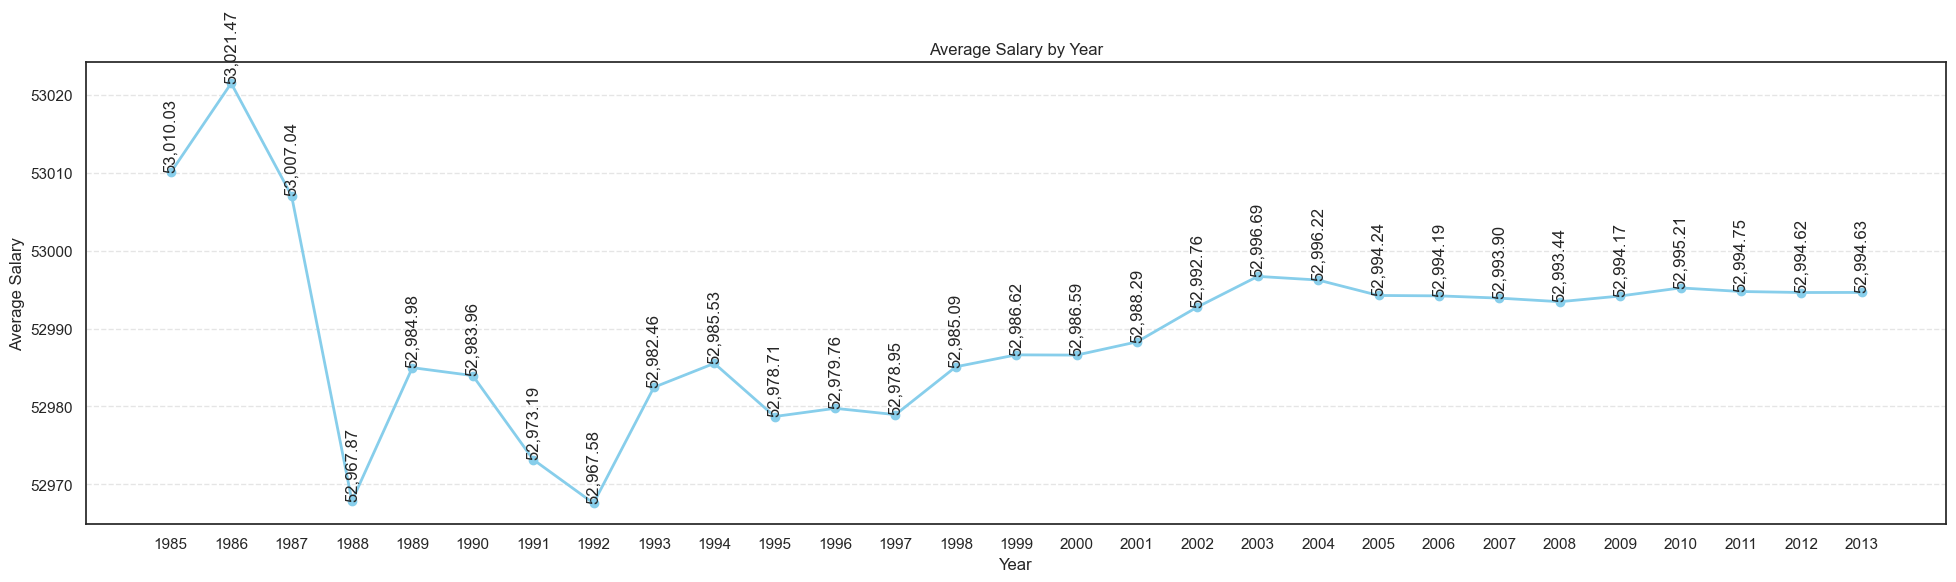

In [392]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure inline visualization in Jupyter Notebook
%matplotlib inline

# Visualization
plt.figure(figsize=(24, 6))
plt.plot(merged_df['years'].astype(str), merged_df['avg_sal'], marker='o', color='skyblue', linestyle='-', linewidth=2)

# Adding data labels vertically with thousand separators
for i, val in enumerate(merged_df['avg_sal']):
    plt.text(i, val, f'{val:,.2f}', ha='center', va='bottom', rotation=90)

plt.title('Average Salary by Year')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### --2. Average Salary by Job Title

In [395]:
result = final_table.groupby('title')['salary'].mean().reset_index(name='avg_sal')
result = result.sort_values(by='avg_sal', ascending=False)
result

,title,avg_sal
4,Senior Staff,58550.172704
5,Staff,58465.382850
2,Manager,51531.041667
6,Technique Leader,48582.896092
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
3,Senior Engineer,48506.799871


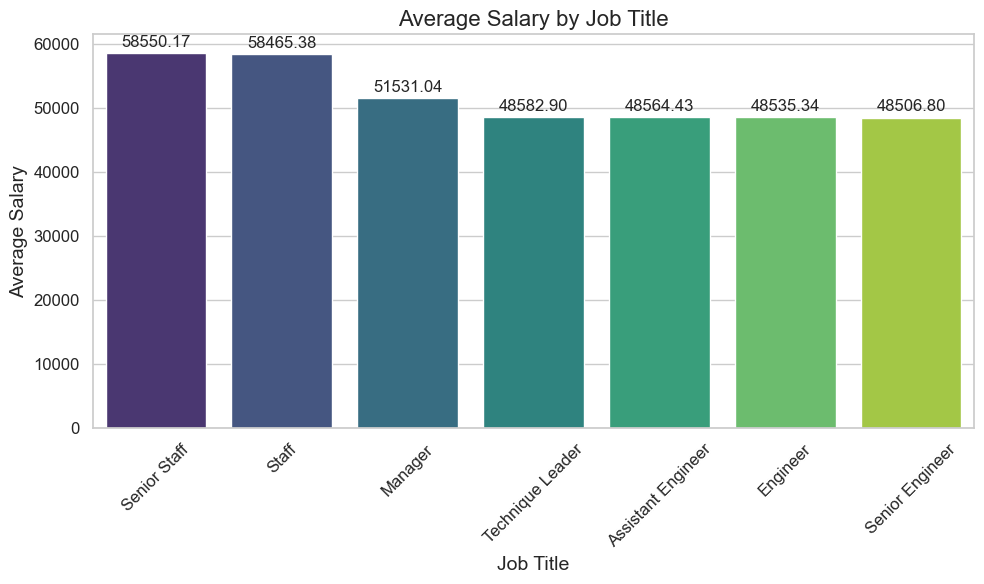

In [397]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='avg_sal', data=result,hue='title', palette='viridis')

plt.title('Average Salary by Job Title', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for index, value in enumerate(result['avg_sal']):
    plt.text(index, value + 500, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

##### --3. Average Salary by Performance Rating

In [400]:
result = final_table.groupby('Last_performance_rating').agg(
    avg_salary=('salary', 'mean'),   
    employee_count=('salary', 'size')  
).reset_index()

result = result.sort_values(by='Last_performance_rating')
result

,Last_performance_rating,avg_salary,employee_count
0,A,52995.871902,95919
1,B,52965.293717,107154
2,C,52962.356600,71304
3,PIP,53013.565243,15105
4,S,52792.556915,10542


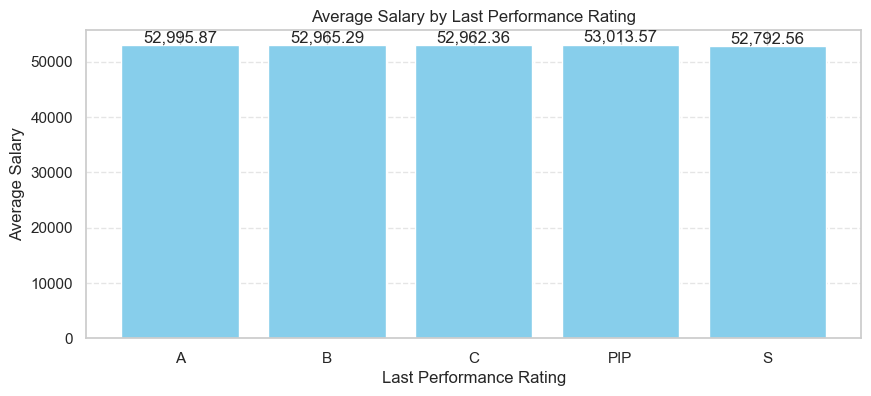

In [404]:
# Visualization
plt.figure(figsize=(10, 4))
plt.bar(result['Last_performance_rating'].astype(str), result['avg_salary'], color='skyblue')

# Adding data labels with thousand separators
for i, val in enumerate(result['avg_salary']):
    plt.text(i, val, f'{val:,.2f}', ha='center', va='bottom')

plt.title('Average Salary by Last Performance Rating')
plt.xlabel('Last Performance Rating')
plt.ylabel('Average Salary')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### --4.Employees by salary range

In [434]:
# Ensuring salary values are rounded properly for accurate binning
final_table['salary'] = final_table['salary'].round()

# Creating salary range categories with adjusted bins
final_table['salary_range'] = pd.cut(
    final_table['salary'],
    bins=[39999, 60000, 80000, 100000, 129492],
    labels=['40k-60k', '60k-80k', '80k-100k', '100k-130k'],
    right=True  # Ensures upper limit is inclusive
)

# Aggregating data
df = final_table.groupby('salary_range', observed=False).agg(
    NO_OF_EMP=('emp_no', 'count')
).reset_index()

# Calculating percentage
df['PCT'] = (df['NO_OF_EMP'] * 100.0 / df['NO_OF_EMP'].sum()).round(2)

df



,salary_range,NO_OF_EMP,PCT
0,40k-60k,216389,72.12
1,60k-80k,66219,22.07
2,80k-100k,16129,5.38
3,100k-130k,1287,0.43


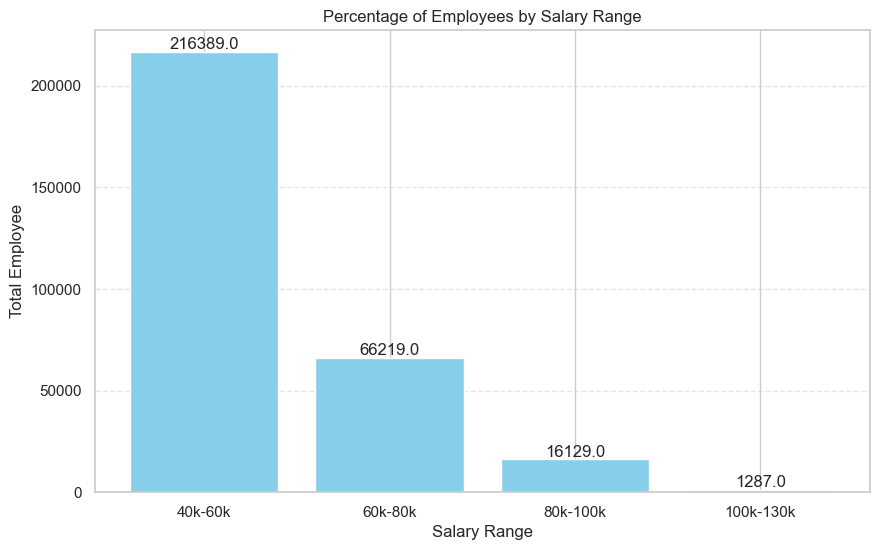

In [436]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(df['salary_range'], df['NO_OF_EMP'], color='skyblue')

# Adding data labels with percentage
for i, val in enumerate(df['NO_OF_EMP']):
    plt.text(i, val, f'{val:.1f}', ha='center', va='bottom')

plt.title('Employees by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Total Employee')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## ** Attrition Analysis**

##### --1. Employee Attrition Analysis

In [439]:
emp_left = final_table[final_table['left'] == 1].shape[0]
emp_stayed = final_table[final_table['left'] == 0].shape[0]

result_df = pd.DataFrame({
    'emp_status': ['emp_left', 'emp_stayed'],
    'no_of_emp': [emp_left, emp_stayed]
})

result_df['percntg'] = (result_df['no_of_emp'] * 100.00) / result_df['no_of_emp'].sum()
result_df

,emp_status,no_of_emp,percntg
0,emp_left,29867,9.95487
1,emp_stayed,270157,90.04513


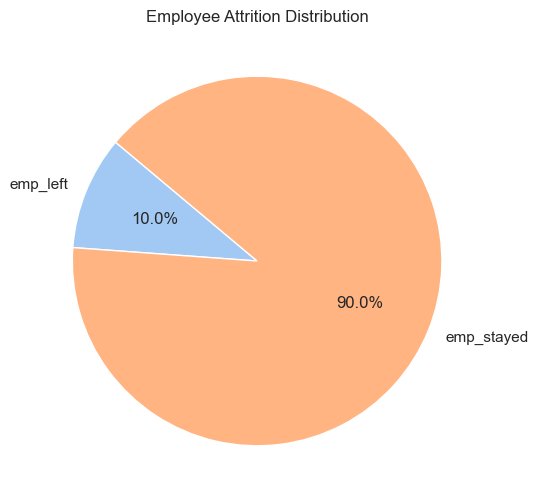

In [441]:
# Define colors for the pie chart
colors = sns.color_palette("pastel")  # Light pastel colors

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(result_df['no_of_emp'], labels=result_df['emp_status'], autopct='%1.1f%%', colors=colors, startangle=140)

# Add a title
plt.title("Employee Attrition Distribution")

# Show the pie chart
plt.show()

##### --2. Overall Employee Attrition by Gender

In [444]:
male_emp = final_table[(final_table['left'] == 1) & (final_table['sex']=='M')].shape[0]
female_emp = final_table[(final_table['left'] == 1) & (final_table['sex']=='F')].shape[0]

gen_df = pd.DataFrame({
    'emp_gender': ['male_emp', 'female_emp'],
    'no_of_emp': [male_emp, female_emp]
})

gen_df['percntg'] = (gen_df['no_of_emp'] * 100.00) / gen_df['no_of_emp'].sum()
gen_df

,emp_gender,no_of_emp,percntg
0,male_emp,17960,60.133257
1,female_emp,11907,39.866743


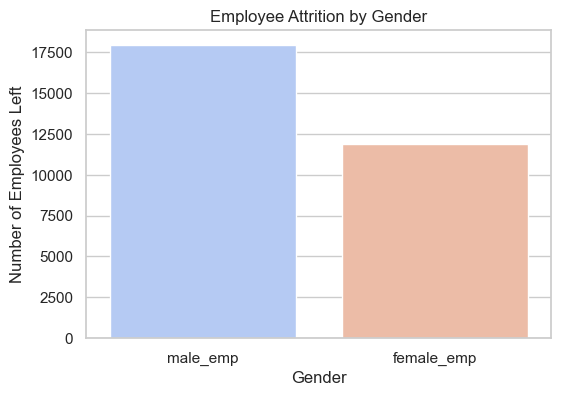

In [446]:
plt.figure(figsize=(6,4))
sns.barplot(x='emp_gender', y='no_of_emp', data=gen_df, hue='emp_gender', legend=False, palette='coolwarm')
plt.xlabel("Gender")
plt.ylabel("Number of Employees Left")
plt.title("Employee Attrition by Gender")
plt.show()

##### --3. Overall Employee Attrition by Department

In [449]:
filtered_df = FINAL_TB[FINAL_TB['left'] == True]
dept_count = filtered_df.groupby('dept_name').size().reset_index(name='total_no')
total_no_sum = dept_count['total_no'].sum()
dept_count['pct'] = dept_count['total_no'] * 100.0 / total_no_sum
dept_count_sorted = dept_count.sort_values(by='total_no', ascending=False)
dept_count_sorted

,dept_name,total_no,pct
8,development,8508,25.765422
4,Production,7389,22.376669
7,Sales,5209,15.774810
0,Customer Service,2414,7.310499
6,Research,2098,6.353533
5,Quality Management,2018,6.111263
3,Marketing,1941,5.878078
2,Human Resources,1797,5.441991
1,Finance,1647,4.987735


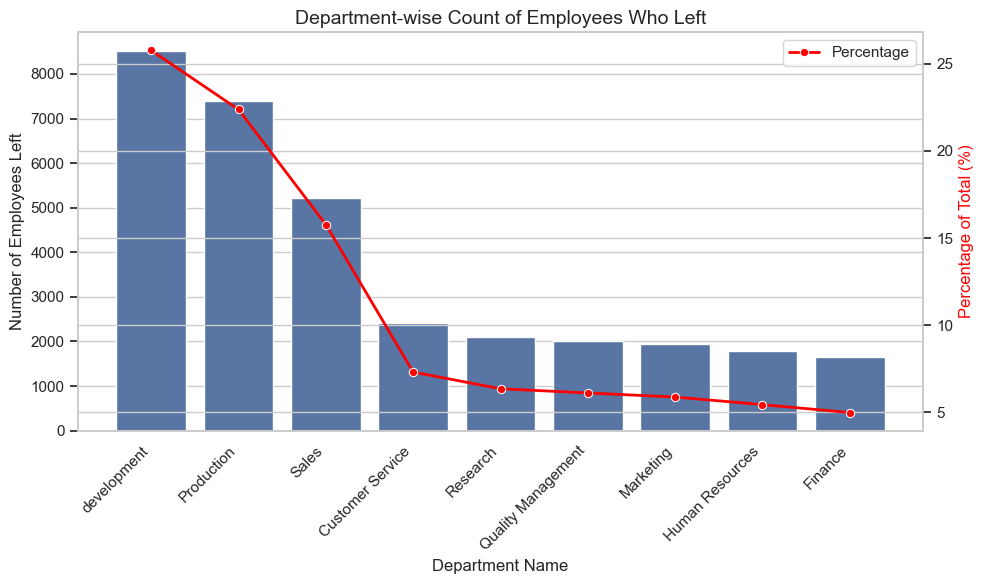

In [451]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dept_count_sorted, x='dept_name', y='total_no', hue=None)

plt.title('Department-wise Count of Employees Who Left', fontsize=14)
plt.xlabel('Department Name', fontsize=12)
plt.ylabel('Number of Employees Left', fontsize=12)

plt.xticks(rotation=45, ha='right')

ax2 = plt.gca().twinx()
sns.lineplot(data=dept_count_sorted, x='dept_name', y='pct', ax=ax2, color='red', marker='o', label='Percentage', linewidth=2)

ax2.set_ylabel('Percentage of Total (%)', fontsize=12, color='red')

# Show the plot
plt.tight_layout()
plt.show()

##### --4. Department and gender-wise share to Overall Employee Attrition

In [456]:
# Aggregating data
df = FINAL_TB[FINAL_TB['left'] == 1].groupby(['dept_name', 'sex']).agg(
    total_no=('emp_no', 'count')
).reset_index()

# Calculating percentage
df['PCT'] = (df['total_no'] * 100.0 / df['total_no'].sum()).round(2)

# Sorting by department name
df = df.sort_values('dept_name').reset_index(drop=True)

df


,dept_name,sex,total_no,PCT
0,Customer Service,F,995,3.01
1,Customer Service,M,1419,4.30
2,Finance,F,670,2.03
3,Finance,M,977,2.96
4,Human Resources,F,721,2.18
5,Human Resources,M,1076,3.26
6,Marketing,F,755,2.29
7,Marketing,M,1186,3.59
8,Production,M,4360,13.20
9,Production,F,3029,9.17


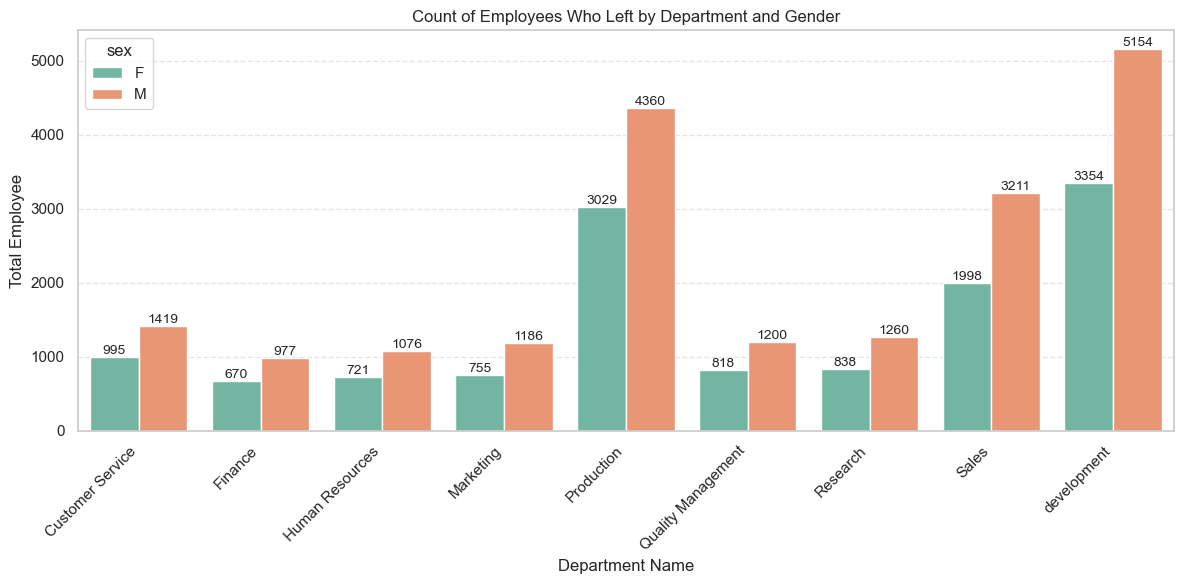

In [462]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='dept_name', y='total_no', hue='sex', palette='Set2')

# Adding data labels
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=10)

plt.title('Count of Employees Who Left by Department and Gender')
plt.xlabel('Department Name')
plt.ylabel('Total Employee')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### --5. Overall Employee Attrition by Job Title

In [465]:
    df_filtered = final_table[final_table['left'] == True]
    
    title_counts = df_filtered.groupby('title').size().reset_index(name='total_no')
    
    total_sum = title_counts['total_no'].sum()
    title_counts['pct'] = title_counts['total_no'] * 100.0 / total_sum
    
    title_counts_sorted = title_counts.sort_values(by='total_no', ascending=False)
    
    title_counts_sorted

,title,total_no,pct
5,Staff,10693,35.802056
3,Senior Engineer,9794,32.792045
1,Engineer,4707,15.759869
4,Senior Staff,2578,8.631600
6,Technique Leader,1533,5.132755
0,Assistant Engineer,560,1.874979
2,Manager,2,0.006696


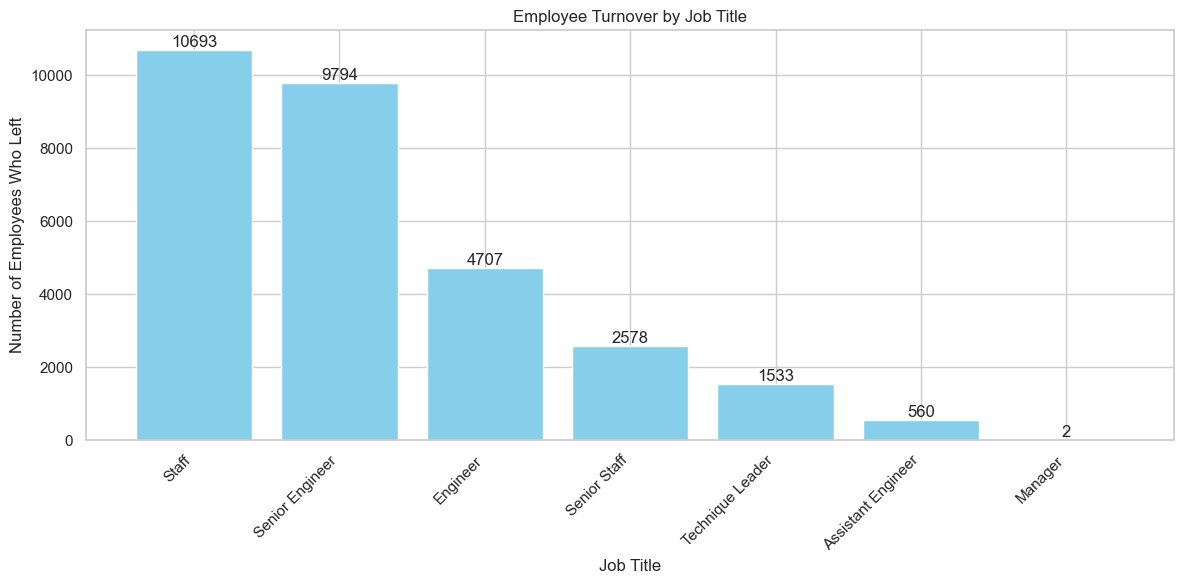

In [507]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(title_counts_sorted['title'], 
               title_counts_sorted['total_no'],
               color='skyblue')

plt.xlabel('Job Title')
plt.ylabel('Number of Employees Who Left')
plt.title('Employee Turnover by Job Title')
plt.xticks(rotation=45, ha='right')

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()



##### --6. Share of Overall Employee Attrition by Job Title and gender

In [516]:

result = (
    final_table[final_table['left'] == 1]
    .groupby(['title', 'sex'])
    .size()
    .reset_index(name='total_no')
)

# Calculate percentage
total_sum = result['total_no'].sum()
result['pct'] = result['total_no'] * 100.0 / total_sum

# Sort by title
result_sorted = result.sort_values('title')

result_sorted

,title,sex,total_no,pct
0,Assistant Engineer,F,237,0.793518
1,Assistant Engineer,M,323,1.081461
2,Engineer,F,1880,6.294573
3,Engineer,M,2827,9.465296
4,Manager,F,2,0.006696
5,Senior Engineer,F,3937,13.181773
6,Senior Engineer,M,5857,19.610272
7,Senior Staff,F,1049,3.512238
8,Senior Staff,M,1529,5.119363
9,Staff,F,4199,14.058995


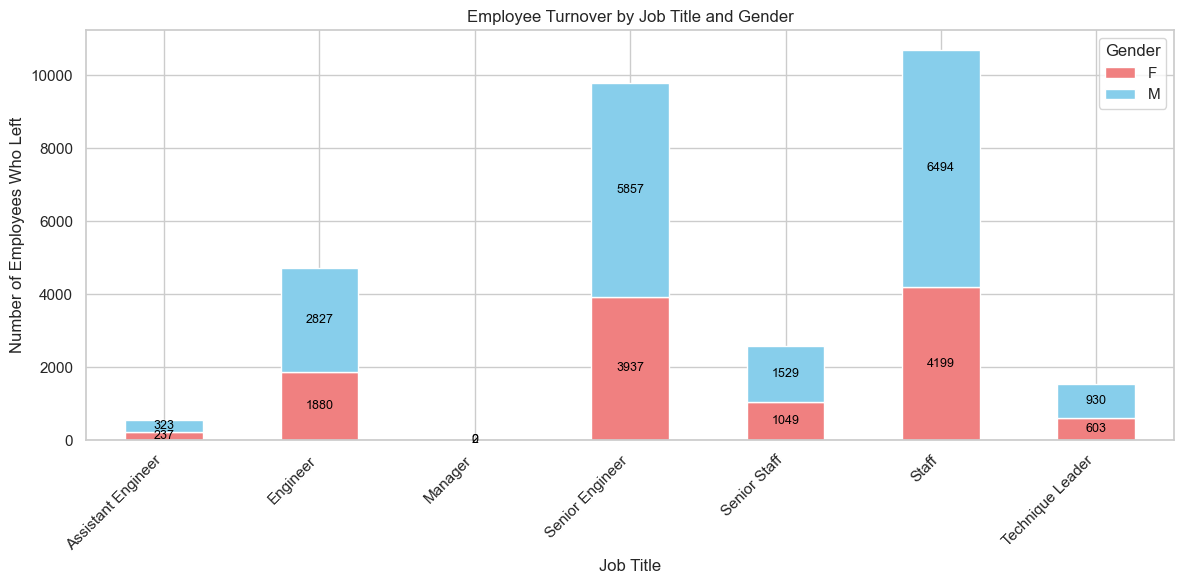

In [518]:
# Pivot the data for visualization
pivot_df = result_sorted.pivot(index='title', columns='sex', values='total_no').fillna(0)

# Create stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), 
                   color=['lightcoral', 'skyblue'])

plt.title('Employee Turnover by Job Title and Gender')
plt.xlabel('Job Title')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45, ha='right')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f', 
                 padding=0, color='black', fontsize=9)

plt.legend(title='Gender')
plt.tight_layout()
plt.show()

##### --7. Share of Overall Employee Attrition by Salary Range

In [521]:
# Step 1: Filter the data where 'left' == 1 (properly using .copy())
filtered_df = final_table.loc[final_table['left'] == True].copy()

# Step 2: Create salary range function
def get_salary_range(salary):
    if 40000 <= salary <= 60000:
        return '40k-60k'
    elif 60001 <= salary <= 80000:
        return '60k-80k'
    elif 80001 <= salary <= 100000:
        return '80k-100k'
    elif 100001 <= salary <= 129492:
        return '100k-130k'
    else:
        return 'Unknown'

# Step 3: Apply the function (now safe because we used .copy())
filtered_df['salary_range'] = filtered_df['salary'].apply(get_salary_range)

# Step 4: Group and count
salary_counts = (filtered_df.groupby('salary_range')['emp_no']
                 .count()
                 .reset_index(name='NO_OF_EMP')
                 .sort_values('salary_range'))

# Step 5: Calculate percentage
total_employees = salary_counts['NO_OF_EMP'].sum()
salary_counts['PCT'] = salary_counts['NO_OF_EMP'] * 100.0 / total_employees

salary_counts

,salary_range,NO_OF_EMP,PCT
0,100k-130k,141,0.472093
1,40k-60k,21727,72.745840
2,60k-80k,6493,21.739713
3,80k-100k,1506,5.042354


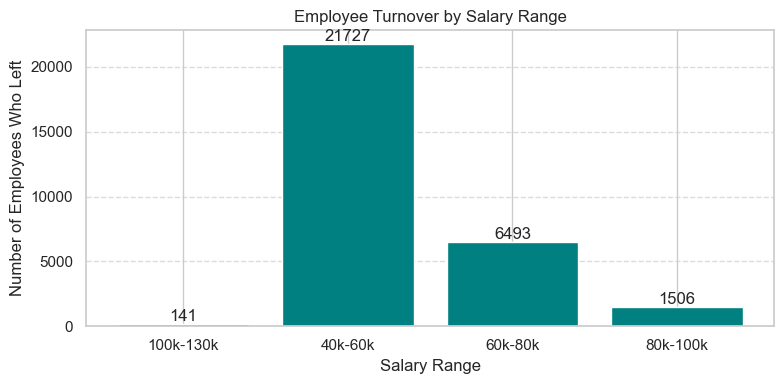

In [527]:
# Create figure
plt.figure(figsize=(8, 4))
bars = plt.bar(salary_counts['salary_range'], 
               salary_counts['NO_OF_EMP'],
               color='teal')

# Customize plot
plt.title('Employee Turnover by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Number of Employees Who Left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


##### --8. Share of Overall Employee Attrition by Performance Rating

In [530]:
filtered_df = final_table[final_table['left'] == 1]
grouped_df = filtered_df.groupby('Last_performance_rating').size().reset_index(name='total_no')
total_count = grouped_df['total_no'].sum()
grouped_df['pct'] = (grouped_df['total_no'] * 100.0) / total_count
grouped_df = grouped_df.sort_values(by='total_no', ascending=False)
grouped_df

,Last_performance_rating,total_no,pct
1,B,10606,35.510764
0,A,9532,31.914822
2,C,7142,23.912680
3,PIP,1517,5.079184
4,S,1070,3.582549


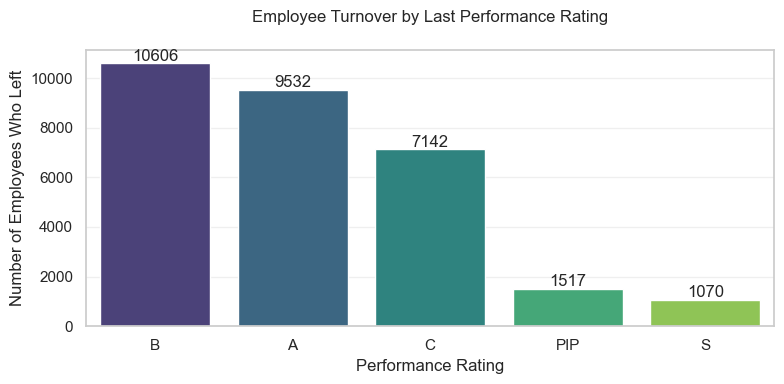

In [538]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

# Updated barplot syntax with hue parameter
ax = sns.barplot(x='Last_performance_rating', 
                 y='total_no', 
                 hue='Last_performance_rating',  # Add this
                 data=grouped_df,
                 palette='viridis',
                 dodge=False,  # Add this to prevent side-by-side bars
                 legend=False,  # Add this to hide redundant legend
                 order=grouped_df['Last_performance_rating'])

plt.title('Employee Turnover by Last Performance Rating', pad=20)
plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees Who Left')
plt.grid(axis='y', alpha=0.3)

# Add data labels
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

##### --9. Attrition by Tenure

In [545]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert dates and calculate tenure (your existing code)
final_table['hire_date'] = pd.to_datetime(final_table['hire_date'])
final_table['last_date'] = pd.to_datetime(final_table['last_date'])
final_table['tenure'] = ((final_table['last_date'].fillna(pd.Timestamp.today()) - final_table['hire_date']).dt.days / 365)

# Fix: Use .copy() when creating filtered_df to avoid SettingWithCopyWarning
filtered_df = final_table[final_table['left'] == 1].copy()  # Added .copy() here

def tenure_group(tenure):
    if 1 <= tenure <= 4:
        return 'Low Tenure(1-4 years)'
    elif 4 < tenure <= 8:
        return 'Medium Tenure(5-8 years)'
    else:
        return 'High Tenure(9+ years)'

# Now this operation is safe
filtered_df['tenure_group'] = filtered_df['tenure'].apply(tenure_group)

# Group and calculate percentages
grouped_df = filtered_df.groupby('tenure_group').size().reset_index(name='NO_OF_EMP')
grouped_df['PCT'] = (grouped_df['NO_OF_EMP'] * 100.00) / grouped_df['NO_OF_EMP'].sum()

# Sort by tenure (custom order for logical display)
tenure_order = ['Low Tenure(1-4 years)', 'Medium Tenure(5-8 years)', 'High Tenure(9+ years)']
grouped_df['tenure_group'] = pd.Categorical(grouped_df['tenure_group'], categories=tenure_order, ordered=True)
grouped_df = grouped_df.sort_values('tenure_group')

grouped_df


,tenure_group,NO_OF_EMP,PCT
1,Low Tenure(1-4 years),6380,21.361369
2,Medium Tenure(5-8 years),9719,32.540931
0,High Tenure(9+ years),13768,46.097700


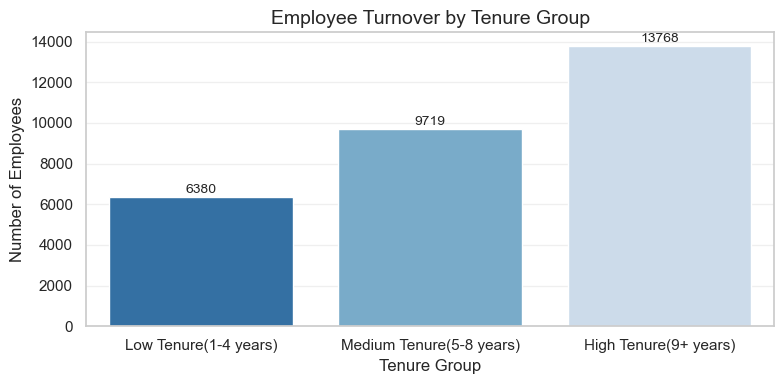

In [551]:
plt.figure(figsize=(8, 4))

# Updated barplot syntax to avoid FutureWarning
ax = sns.barplot(x='tenure_group', 
                 y='NO_OF_EMP', 
                 hue='tenure_group',  # Added to fix warning
                 data=grouped_df, 
                 palette='Blues_r', 
                 order=tenure_order,
                 dodge=False,  # Prevents side-by-side bars
                 legend=False)  # Hides redundant legend

plt.title('Employee Turnover by Tenure Group', fontsize=14)
plt.xlabel('Tenure Group', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)

# Add data labels (counts only)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",  # Removed percentage
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', 
                va='center', 
                fontsize=10,
                xytext=(0, 5), 
                textcoords='offset points')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

##### --10. Overall Employee Attrition by Age Group

In [556]:
# Calculate age (fixed to use birth_date instead of hire_date)
final_table['birth_date'] = pd.to_datetime(final_table['birth_date'])
final_table['last_date'] = pd.to_datetime(final_table['last_date'])
final_table['age'] = ((final_table['last_date'].fillna(pd.Timestamp.today()) - final_table['birth_date']).dt.days / 365)

# Create filtered copy to avoid SettingWithCopyWarning
filtered_df = final_table[final_table['left'] == 1].copy()  # Added .copy() here

def age_group(age):
    if 21 <= age <= 30:
        return '21-30'
    elif 30 < age <= 40:
        return '31-40'
    elif 40 < age <= 50:
        return '41-50'
    elif 50 < age <= 60:
        return '51-60'     
    else:
        return '60+'

# Now safe to modify
filtered_df['age_group'] = filtered_df['age'].apply(age_group)

# Group and calculate
age_order = ['21-30', '31-40', '41-50', '51-60', '60+']
grouped_df = (filtered_df.groupby('age_group')
              .size()
              .reindex(age_order)  # Ensure proper ordering
              .reset_index(name='NO_OF_EMP'))
grouped_df['PCT'] = (grouped_df['NO_OF_EMP'] * 100.00) / grouped_df['NO_OF_EMP'].sum()
grouped_df

,age_group,NO_OF_EMP,PCT
0,21-30,2313,7.744333
1,31-40,14674,49.131148
2,41-50,11605,38.855593
3,51-60,1273,4.262229
4,60+,2,0.006696


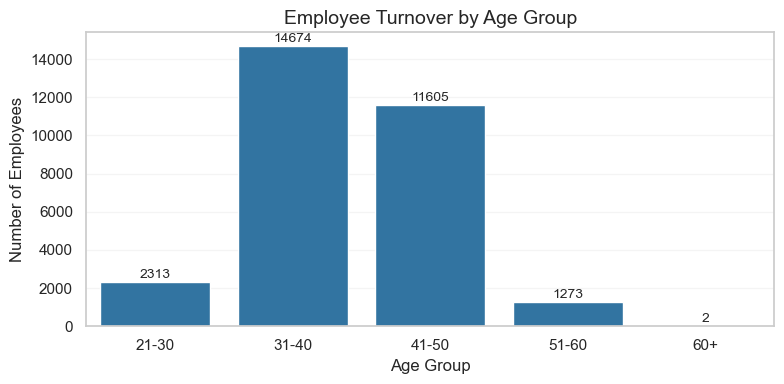

In [560]:
# Visualization (counts only)
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    x='age_group',
    y='NO_OF_EMP',
    data=grouped_df,
    color='#1f77b4',  # Single color avoids palette warning
    order=age_order
)

plt.title('Employee Turnover by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)

# Add count labels
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10
    )

plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

##### --11. Overall Employee Attrition by Number of Projects

In [567]:
project_counts = (
    final_table[final_table['left'] == 1]
    .assign(project_category=lambda x: pd.cut(
        x['no_of_projects'],
        bins=[0, 3, 7, 10, float('inf')],
        labels=['Low(1-3)', 'Medium(4-7)', 'High(8-10)', 'Out of Range'],
        right=True
    ))
    .groupby('project_category', observed=True)  # Added observed=True here
    .agg(NO_OF_EMP=('emp_no', 'count'))
    .reset_index()
    .sort_values('NO_OF_EMP', ascending=False)
)

# Calculate percentage (for reference, not shown in visual)
project_counts['PCT'] = (project_counts['NO_OF_EMP'] / project_counts['NO_OF_EMP'].sum()) * 100
project_counts

,project_category,NO_OF_EMP,PCT
1,Medium(4-7),11944,39.990625
2,High(8-10),9028,30.227341
0,Low(1-3),8895,29.782034


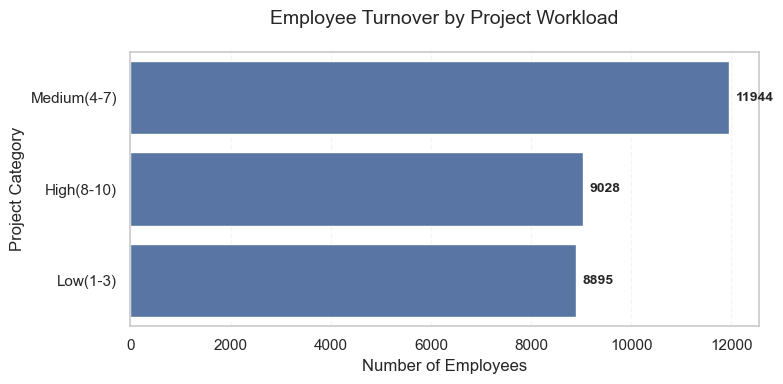

In [571]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    y='project_category',
    x='NO_OF_EMP',
    data=project_counts,
    order=project_counts['project_category'],
    color='#4c72b0'
)

plt.title('Employee Turnover by Project Workload', fontsize=14, pad=20)
plt.ylabel('Project Category', fontsize=12)
plt.xlabel('Number of Employees', fontsize=12)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_width())}",
        (p.get_width(), p.get_y() + p.get_height()/2),
        ha='left',
        va='center',
        xytext=(5, 0),
        textcoords='offset points',
        fontsize=10,
        weight='bold'
    )

plt.grid(axis='x', alpha=0.2, linestyle='--')
plt.tight_layout()
plt.show()

#####  --12. Year wise attrition rate 

In [576]:
# Get hired employees by year
hired = (final_table.groupby(final_table['hire_date'].dt.year)
           .agg(total_emp_hired=('emp_no', 'count'))
           .reset_index()
           .rename(columns={'hire_date': 'year'}))

# Get left employees by year
left = (final_table[final_table['left'] == 1]
          .groupby(final_table['last_date'].dt.year)
          .agg(total_emp_left=('emp_no', 'count'))
          .reset_index()
          .rename(columns={'last_date': 'year'}))

# Merge with outer join
merged = pd.merge(hired, left, on='year', how='outer').fillna(0)

# Calculate cumulative sums
merged['cum_hired_emp_count'] = merged['total_emp_hired'].cumsum()
merged['cum_left_emp_count'] = merged['total_emp_left'].cumsum()

# Calculate the derived metrics
merged['new_count'] = merged['cum_left_emp_count'].shift(1).fillna(0)
merged['total_emp'] = merged['cum_hired_emp_count'] - merged['new_count']
merged['pct'] = (merged['total_emp_left'] / merged['total_emp']) * 100

# Sort by year and clean up
result = merged.sort_values('year').reset_index(drop=True)
result['years'] = result['year']  # Add years column to match SQL output

result[['years', 'total_emp_hired', 'total_emp_left', 
             'cum_hired_emp_count', 'cum_left_emp_count',
             'new_count', 'total_emp', 'pct']]

,years,total_emp_hired,total_emp_left,cum_hired_emp_count,cum_left_emp_count,new_count,total_emp,pct
0,1985.0,35316.0,0.0,35316.0,0.0,0.0,35316.0,0.000000
1,1986.0,36150.0,42.0,71466.0,42.0,0.0,71466.0,0.058769
2,1987.0,33501.0,305.0,104967.0,347.0,42.0,104925.0,0.290684
3,1988.0,31436.0,605.0,136403.0,952.0,347.0,136056.0,0.444670
4,1989.0,28394.0,916.0,164797.0,1868.0,952.0,163845.0,0.559065
5,1990.0,25610.0,1131.0,190407.0,2999.0,1868.0,188539.0,0.599876
6,1991.0,22568.0,1375.0,212975.0,4374.0,2999.0,209976.0,0.654837
7,1992.0,20402.0,1494.0,233377.0,5868.0,4374.0,229003.0,0.652393
8,1993.0,17772.0,1759.0,251149.0,7627.0,5868.0,245281.0,0.717137
9,1994.0,14835.0,1870.0,265984.0,9497.0,7627.0,258357.0,0.723805


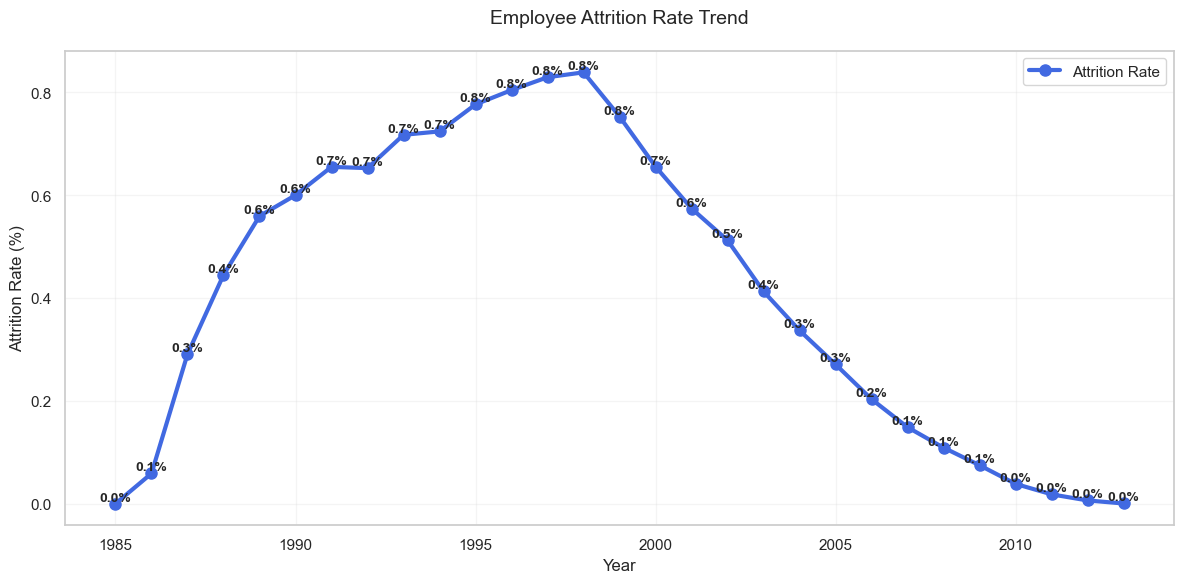

In [588]:
# Calculate the data (using the same code as before)
hired = (final_table.groupby(final_table['hire_date'].dt.year)
           .agg(total_emp_hired=('emp_no', 'count'))
           .reset_index()
           .rename(columns={'hire_date': 'year'}))

left = (final_table[final_table['left'] == 1]
          .groupby(final_table['last_date'].dt.year)
          .agg(total_emp_left=('emp_no', 'count'))
          .reset_index()
          .rename(columns={'last_date': 'year'}))

merged = pd.merge(hired, left, on='year', how='outer').fillna(0)
merged['cum_hired_emp_count'] = merged['total_emp_hired'].cumsum()
merged['cum_left_emp_count'] = merged['total_emp_left'].cumsum()
merged['new_count'] = merged['cum_left_emp_count'].shift(1).fillna(0)
merged['total_emp'] = merged['cum_hired_emp_count'] - merged['new_count']
merged['pct'] = (merged['total_emp_left'] / merged['total_emp']) * 100
result = merged.sort_values('year').reset_index(drop=True)

# Create line chart with data labels
plt.figure(figsize=(12, 6))
line = plt.plot(result['year'], result['pct'], 
               marker='o', markersize=8,
               color='royalblue', linewidth=3,
               label='Attrition Rate')

plt.title('Employee Attrition Rate Trend', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.grid(alpha=0.2)

# Add data labels
for x, y in zip(result['year'], result['pct']):
    plt.text(x, y, f'{y:.1f}%', 
             ha='center', va='bottom',
             fontsize=10, weight='bold')

plt.legend()
plt.tight_layout()
plt.show()